In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import csv
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
location = "D:/Harshavardan/data"
#location = "//storage.ncbs.res.in/harshavardanbn/data/shock_us/210725/F1"
files = 111
fps = 100

FileNotFoundError: [Errno 2] No such file or directory: 'D:/Harshavardan/data/rawmotion71.csv'

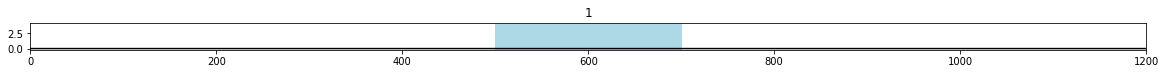

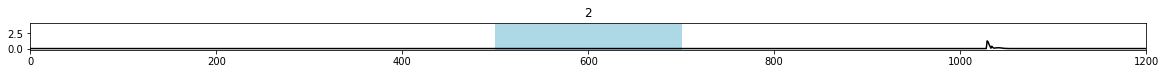

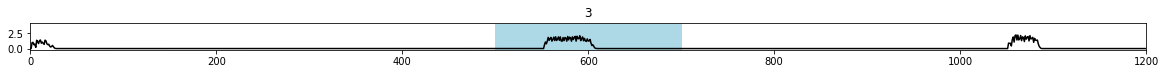

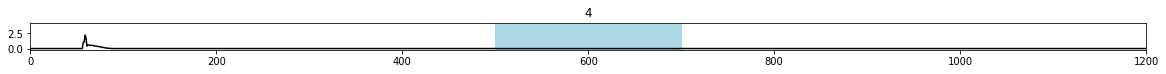

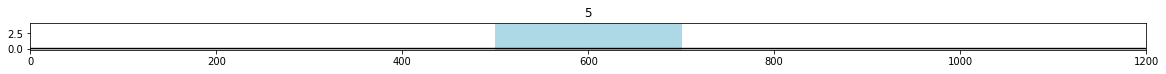

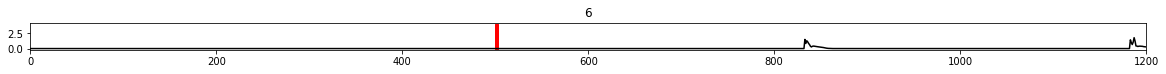

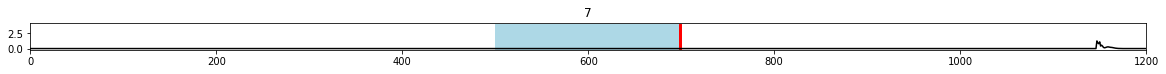

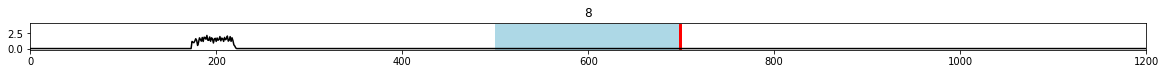

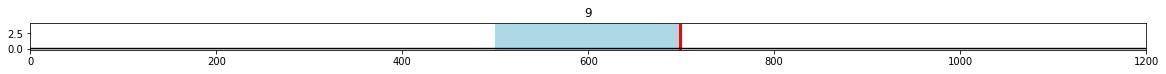

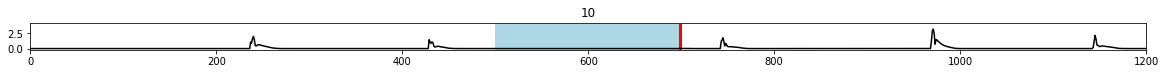

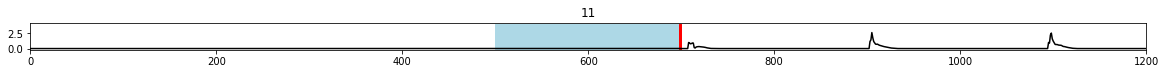

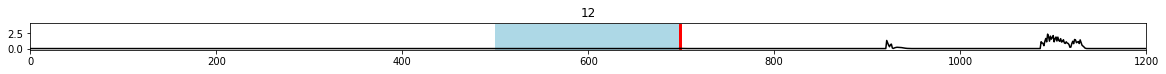

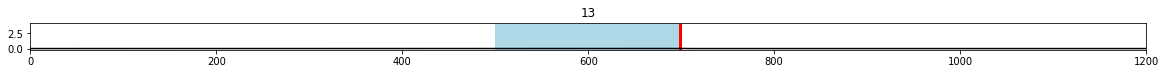

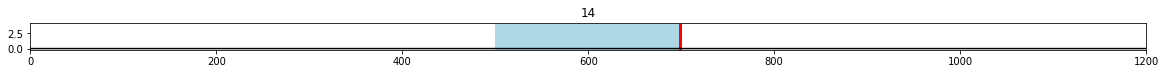

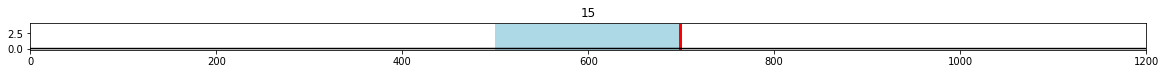

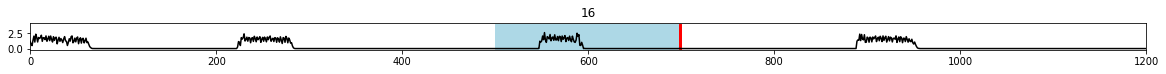

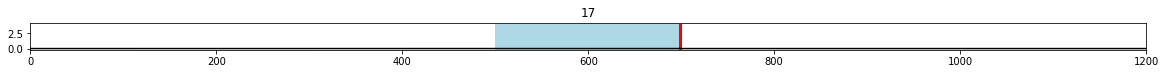

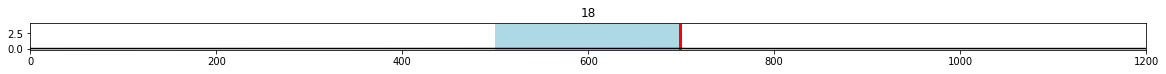

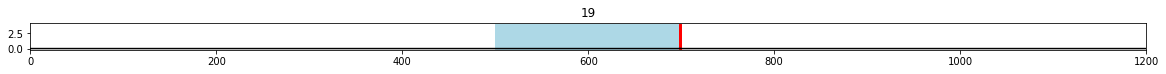

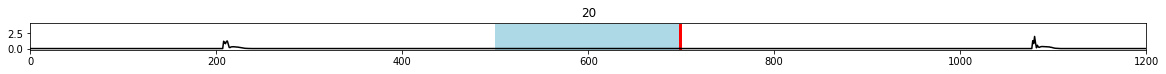

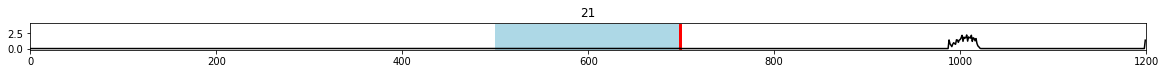

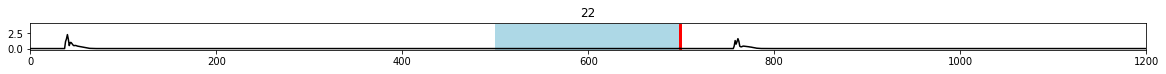

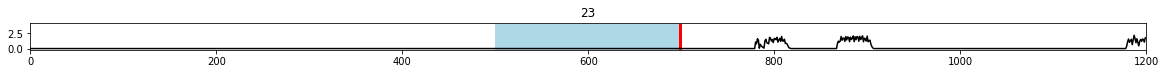

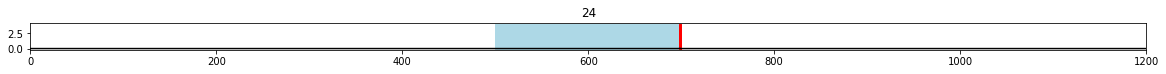

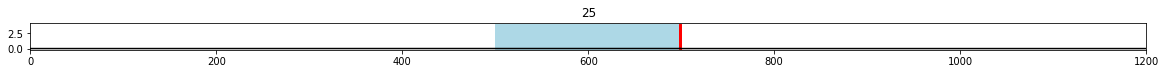

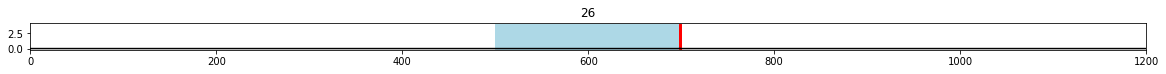

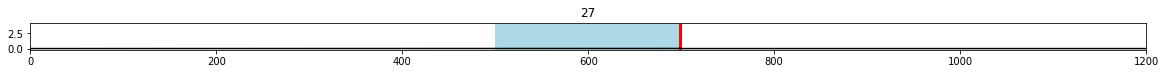

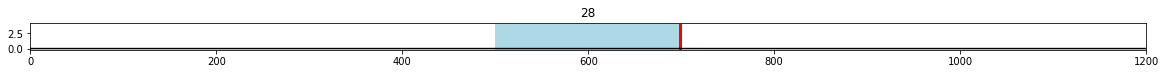

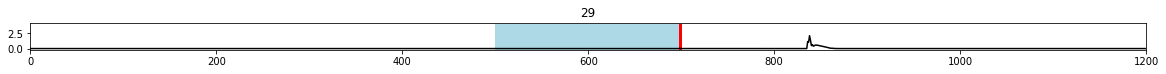

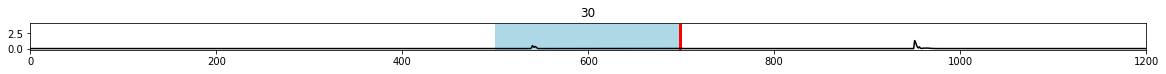

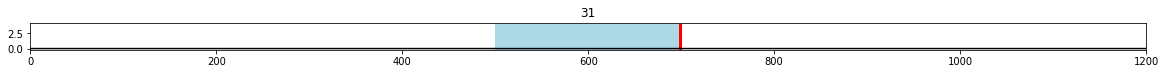

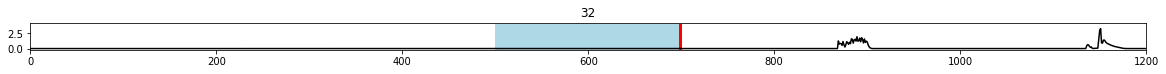

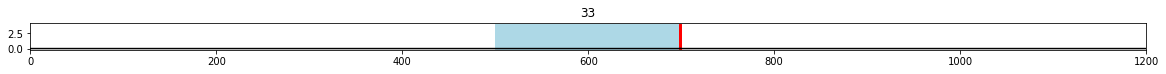

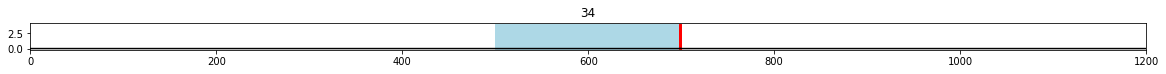

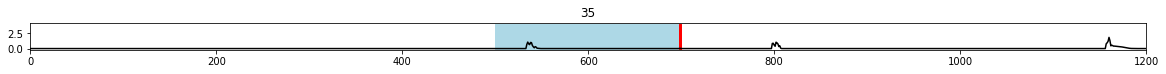

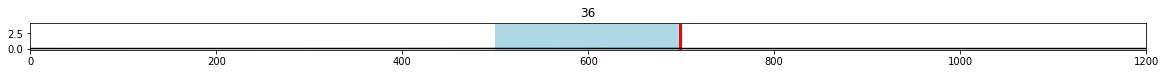

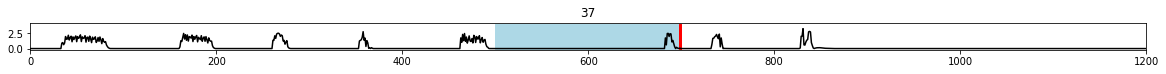

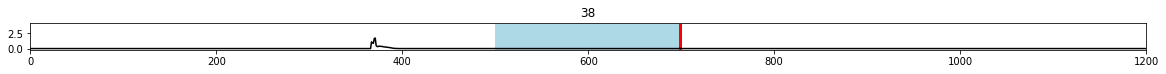

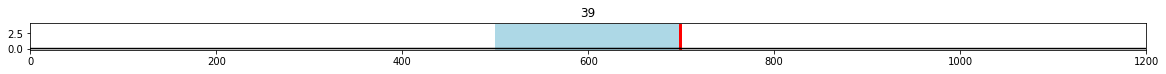

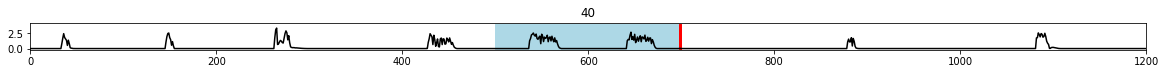

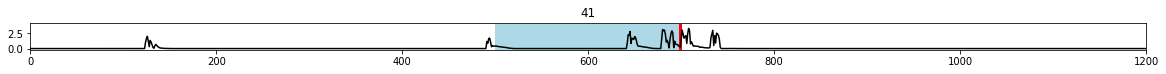

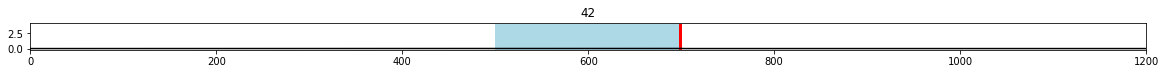

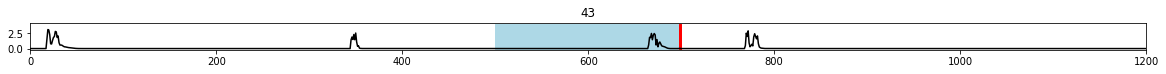

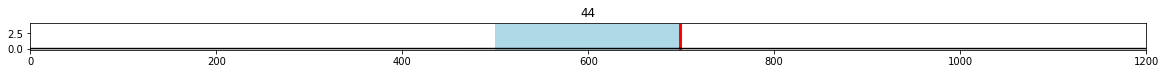

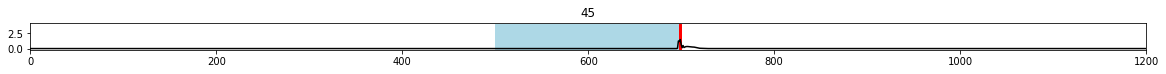

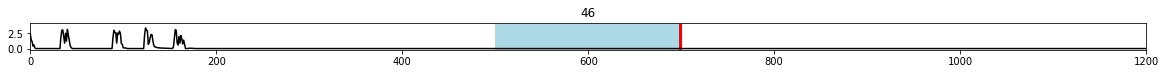

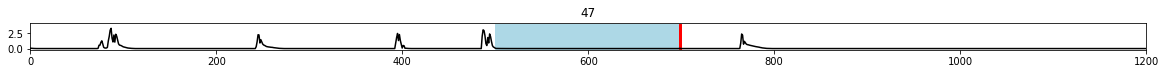

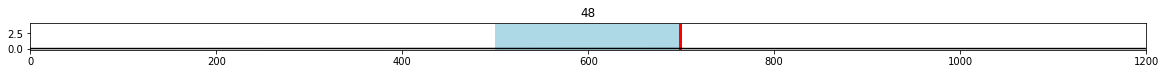

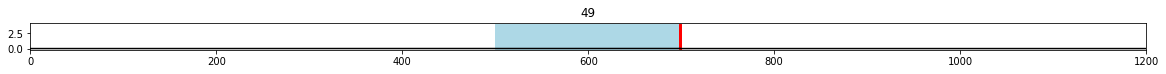

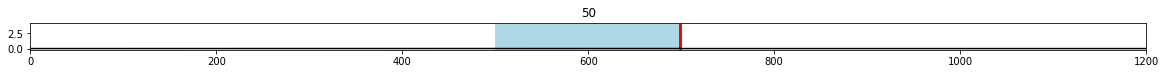

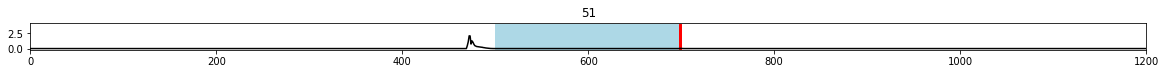

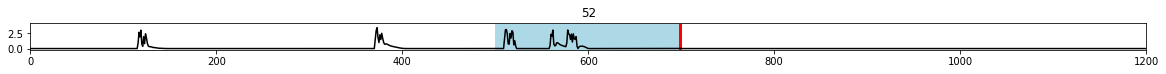

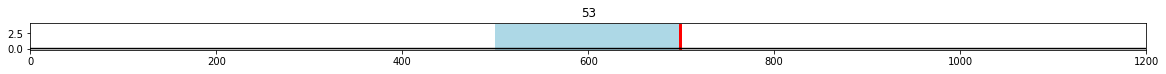

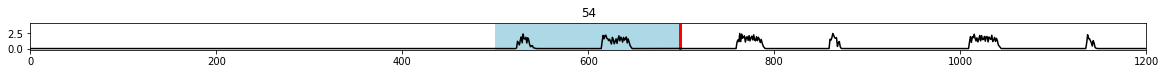

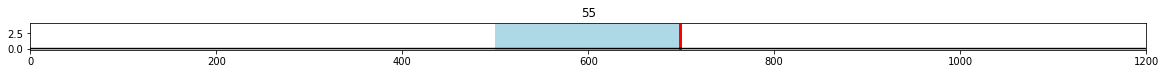

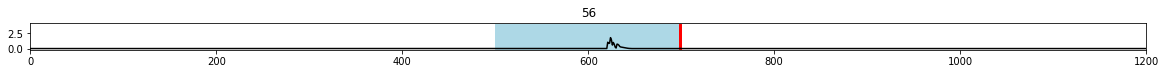

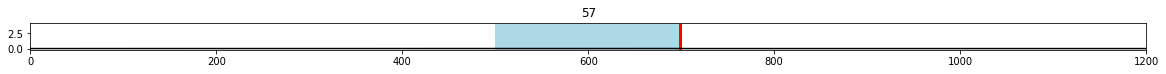

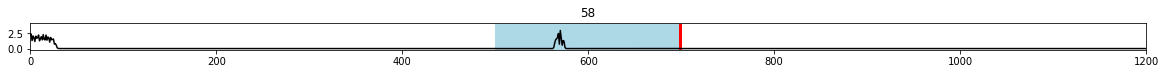

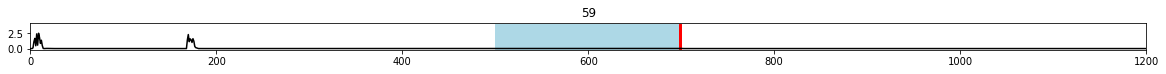

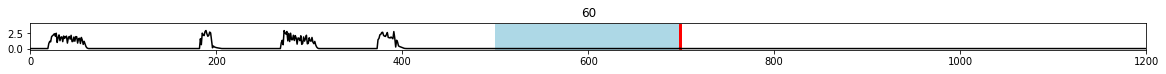

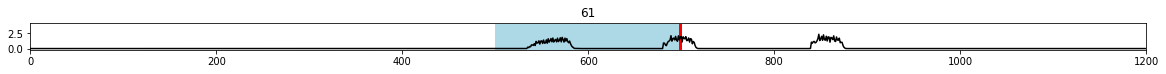

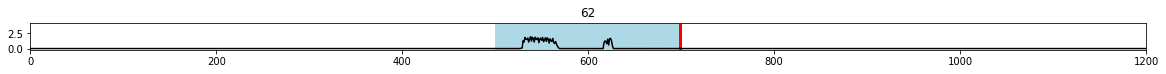

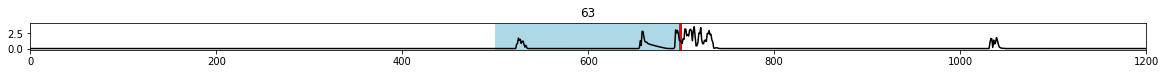

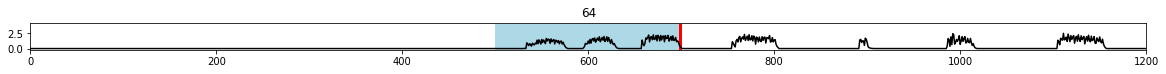

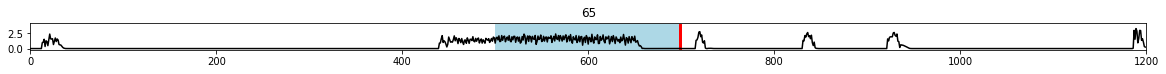

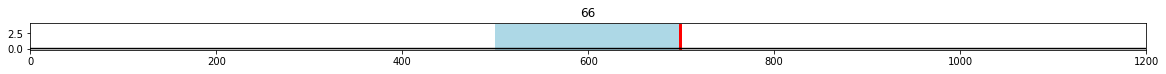

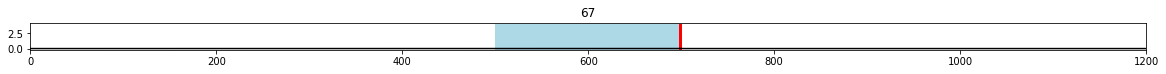

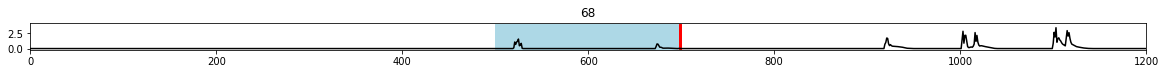

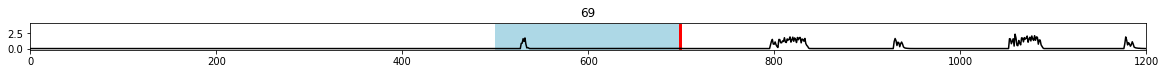

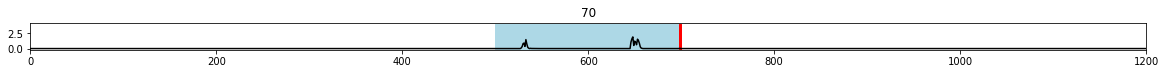

In [3]:
all_trials = []
ylim = 4
for i in range(1, files + 1):
    temp = []
    with open(location + "/rawmotion" + str(i) + ".csv", "r") as file:
        reader = csv.reader(file)
        for row in reader:
            temp.append(float(row[0]))
    all_trials.append(temp[:1200])
    plt.figure(figsize = (20, 0.5))
    plt.plot(all_trials[-1][:], "k")
    plt.xlim(0, 1200)
    #plt.ylim(0, 0.1)
    plt.title(i)
    if i < 6:
        plt.fill_between([500, 700], [ylim, ylim], color = "lightblue")
    elif i == 6:
        plt.fill_between([500, 502.5], [ylim, ylim], color = "red")
    elif i < 107:
        plt.fill_between([500, 700], [ylim, ylim], color = "lightblue")
        plt.fill_between([697.5, 700], [ylim, ylim], color = "red")
    else:
        plt.fill_between([500, 700], [ylim, ylim], color = "lightblue")
all_trials = np.array(all_trials)

In [ ]:
# for i in range(0, 5):
#     plt.figure(figsize = (20, 2))
#     plt.plot(all_trials[i][:1200])
#     plt.ylim(0, 5)
#     plt.plot([500, 500], [0, 5], "k")
#     plt.plot([700, 700], [0, 5], "k")
#     plt.title("CS " + str(i + 1))
#     if i == 0:
#         avg_cs = np.array(all_trials[i][:1200]) / 5
#     else:
#         avg_cs = avg_cs + np.array(all_trials[i][:1200]) / 5

# plt.figure(figsize = (20, 5))
# plt.plot(avg_cs)
# plt.ylim(0, 1)
# plt.plot([500, 500], [0, 5], "k")
# plt.plot([700, 700], [0, 5], "k")
# plt.title("Average CS")

In [ ]:
# for i in range(5, 10):
#     plt.figure(figsize = (20, 2))
#     plt.plot(all_trials[i][:1200])
#     plt.ylim(0, 5)
#     plt.title("US " + str(i - 4))
#     if i == 5:
#         avg_us = np.array(all_trials[i][:1200]) / 5
#     else:
#         avg_us = avg_us + np.array(all_trials[i][:1200]) / 5

# plt.figure(figsize = (20, 5))
# plt.plot(avg_us)
# plt.ylim(0, 1)
# plt.title("Average US")

# # plt.figure(figsize = (20, 10))
# # plt.plot(all_trials[5][480:520])

In [ ]:
# for i in range(10, 99):
#     plt.figure(figsize = (20, 2))
#     plt.plot(all_trials[i][:1200])
#     plt.ylim(0, 5)
#     plt.plot([500, 500], [0, 5], "k")
#     plt.plot([700, 700], [0, 5], "k")
#     plt.title("Training " + str(i - 9))
#     if i == 10:
#         avg_tr = np.array(all_trials[i][:1200]) / 100
#     else:
#         avg_tr = avg_tr + np.array(all_trials[i][:1200]) / 100

# plt.figure(figsize = (20, 5))
# plt.plot(avg_tr)
# plt.ylim(0, 1)
# plt.plot([500, 500], [0, 5], "k")
# plt.plot([700, 700], [0, 5], "k")
# plt.title("Average Training")

In [ ]:
# for i in range(110, 115):
#     plt.figure(figsize = (20, 2))
#     plt.plot(all_trials[i][:1200])
#     plt.ylim(0, 5)
#     plt.plot([500, 500], [0, 5], "k")
#     plt.plot([700, 700], [0, 5], "k")
#     plt.title("Test " + str(i - 109))
#     if i == 110:
#         avg_te = np.array(all_trials[i][:1200]) / 5
#     else:
#         avg_te = avg_te + np.array(all_trials[i][:1200]) / 5

# plt.figure(figsize = (20, 5))
# plt.plot(avg_te)
# plt.ylim(0, 1)
# plt.plot([500, 500], [0, 5], "k")
# plt.plot([700, 700], [0, 5], "k")
# plt.title("Average Test")

In [ ]:
maximum = 0
for i in all_trials:
    if max(i) > maximum:
        maximum = max(i)

all_trials /= maximum
contrast = np.round((all_trials - np.min(all_trials)) / (np.max(all_trials) - np.min(all_trials)) * 255)

In [ ]:
plt.figure(figsize = (10, 10))
plt.imshow(contrast, aspect = "auto")#, cmap = cm.Blues)
#plt.savefig("heatmap.png")
plt.title(location)
plt.plot([500, 500], [0, 110], "b")

In [ ]:
avg = []
for i in range(1200):
    temp = 0
    for j in range(10):
        temp += all_trials[j][i]
    avg.append(temp / 10)

In [ ]:
avg1 = []
for i in range(1200):
    temp = 0
    for j in range(6, 31):
        temp += all_trials[j][i]
    avg1.append(temp)

avg1 = np.array(avg1) / 25
maximum = max(avg1)
plt.figure(figsize = (20, 5))
plt.fill_between([500, 700], [maximum * 1.1, maximum * 1.1], color = "lightblue")
plt.fill_between([697.5, 700], [maximum * 1.1, maximum * 1.1], color = "red")
plt.plot(pd.Series(avg1).rolling(1).mean(), "k")

In [ ]:
avg2 = []
for i in range(1200):
    temp = 0
    for j in range(31, 56):
        temp += all_trials[j][i]
    avg2.append(temp)

avg2 = np.array(avg2) / 25
maximum = max(avg2)
plt.figure(figsize = (20, 5))
plt.fill_between([500, 700], [maximum * 1.1, maximum * 1.1], color = "lightblue")
plt.fill_between([697.5, 700], [maximum * 1.1, maximum * 1.1], color = "red")
plt.plot(pd.Series(avg2).rolling(1).mean(), "k")

In [ ]:
avg3 = []
for i in range(1200):
    temp = 0
    for j in range(56, 81):
        temp += all_trials[j][i]
    avg3.append(temp)

avg3 = np.array(avg3) / 25
maximum = max(avg3)
plt.figure(figsize = (20, 5))
plt.fill_between([500, 700], [maximum * 1.1, maximum * 1.1], color = "lightblue")
plt.fill_between([697.5, 700], [maximum * 1.1, maximum * 1.1], color = "red")
plt.plot(avg3, "k")

In [ ]:
avg4 = []
for i in range(1200):
    temp = 0
    for j in range(81, 106):
        temp += all_trials[j][i]
    avg4.append(temp)

avg4 = np.array(avg4) / 25  
maximum = max(avg4)
plt.figure(figsize = (20, 5))
plt.fill_between([500, 700], [maximum * 1.1, maximum * 1.1], color = "lightblue")
plt.fill_between([697.5, 700], [maximum * 1.1, maximum * 1.1], color = "red")
plt.plot(avg4, "k")

In [ ]:
plt.figure(figsize = (20, 10))
plt.plot(avg1, "0.8")
plt.plot(avg2, "0.7")
plt.plot(avg3, "0.6")
plt.plot(avg4, "0.5")

In [ ]:
avg5 = []
for i in range(1200):
    temp = 0
    for j in range(106, 111):
        temp += all_trials[j][i]
    avg5.append(temp)

avg5 = np.array(avg5) / 5  
maximum = max(avg5)
plt.figure(figsize = (20, 5))
plt.fill_between([500, 700], [maximum * 1.1, maximum * 1.1], color = "lightblue")
plt.plot(avg5, "k")

In [ ]:
avg6 = []
for i in range(1200):
    temp = 0
    for j in range(0, 5):
        temp += all_trials[j][i]
    avg6.append(temp)

avg6 = np.array(avg6) / 5  
maximum = max(avg6)
plt.figure(figsize = (20, 5))
plt.fill_between([500, 700], [maximum * 1.1, maximum * 1.1], color = "lightblue")
plt.plot(avg6, "k")